# 1. Bitcoin and Cryptocurrencies: 

Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future. In fact, on the 6th of December of 2021, Bitcoin has a market capitalization around $1 Trillion.

The data I will be using for my cryptocurrency exploratory data analysis is coming directly from the Coin-Gecko API. The link to the API documentation can be found here https://www.coingecko.com/en/api/documentation. I found working with the API a breeze and using the python API wrapper made setting parameters simple. The only downside is each call is limited to 250 coins, but I found a way around that to get a list of 1000 coins. 

### Setting up enviroment 

In [66]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')


### Connecting to Coin Gecko API

Single Coin Parameters 

In [67]:
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 38043}}

JSON file received after pinging the API

In [68]:
coin_market=cg.get_coins_markets(vs_currency='usd')

In [69]:
coin_market[:1]

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 38043,
  'market_cap': 721134019784,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 798473813095,
  'total_volume': 20137975232,
  'high_24h': 38377,
  'low_24h': 36689,
  'price_change_24h': 1303.66,
  'price_change_percentage_24h': 3.5484,
  'market_cap_change_24h': 24190358101,
  'market_cap_change_percentage_24h': 3.47092,
  'circulating_supply': 18965950.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -44.93057,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 55973.03238,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2022-02-23T04:23:58.121Z'}]

The downside with this API is we can only get 250 coins per call. To get around this, I'm going to make four API calls and concat them into a single dataframe. 

In [70]:
first_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=1,price_change_percentage
='24h,7d')
df1=pd.DataFrame(first_250_coins)
second_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=2,price_change_percentage
='24h,7d')
df2=pd.DataFrame(second_250_coins)
third_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=3,price_change_percentage
='24h,7d')
df3=pd.DataFrame(third_250_coins)
forth_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=4,price_change_percentage
='24h,7d')
df4=pd.DataFrame(forth_250_coins)
df=pd.concat([df1,df2,df3,df4],ignore_index=True,)
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,38043.0,721134019784,1,798473813095.0,20137975232.0,38377.0,...,69045.0,-44.93057,2021-11-10T14:24:11.849Z,67.81,55973.03238,2013-07-06T00:00:00.000Z,None,2022-02-23T04:23:58.121Z,3.5484045955308283,-14.652639420612193
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2643.16,316274066805,2,NaN,15026221049.0,2653.97,...,4878.26,-45.83405,2021-11-10T14:24:19.604Z,0.432979,610173.69221,2015-10-20T00:00:00.000Z,"{'times': 91.98198917844219, 'currency': 'btc'...",2022-02-23T04:24:23.701Z,4.59085805935834,-16.863318003268656
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.003,79609833194,3,NaN,42652518131.0,1.005,...,1.32,-24.23443,2018-07-24T00:00:00.000Z,0.572521,75.09414,2015-03-02T00:00:00.000Z,None,2022-02-23T04:21:34.387Z,0.171535995004725,0.36262407271708846
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,375.05,63048336666,4,63048336666.0,1494498118.0,376.09,...,686.31,-45.38568,2021-05-10T07:24:17.097Z,0.0398177,941244.50494,2017-10-19T00:00:00.000Z,None,2022-02-23T04:24:01.969Z,5.693475268234085,-13.477412960328191
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.001,52863942571,5,NaN,3061095953.0,1.004,...,1.17,-14.49204,2019-05-08T00:40:28.300Z,0.891848,12.43587,2021-05-19T13:14:05.611Z,None,2022-02-23T04:24:26.089Z,0.09045092737229936,0.12951025042985528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,infinity-pad,ipad,Infinity Pad,https://assets.coingecko.com/coins/images/1730...,0.02203247,13434941,990,22024493.0,122328.0,0.0249172,...,0.069953,-68.49582,2021-11-29T16:23:45.058Z,0.01366658,61.25658,2021-07-26T04:27:43.030Z,None,2022-02-23T04:24:35.031Z,-11.437499448701342,-16.339980520260795
996,media-licensing-token,mlt,Media Licensing Token,https://assets.coingecko.com/coins/images/1565...,0.14418,13429996,994,NaN,453712.0,0.147856,...,0.909382,-84.14199,2021-11-25T01:45:51.543Z,0.01641043,778.76924,2021-07-20T11:06:19.222Z,None,2022-02-23T04:24:44.795Z,1.0481366947140998,-26.553651342105766
997,populous,ppt,Populous,https://assets.coingecko.com/coins/images/753/...,0.376059,13402927,999,NaN,376742.0,0.406239,...,75.19,-99.50793,2018-01-28T00:00:00.000Z,0.146812,152.00304,2020-03-13T02:29:30.800Z,"{'times': 0.5042369546749136, 'currency': 'usd...",2022-02-23T04:24:33.719Z,14.020553073862144,-21.881155167971155
998,polychain-monsters,pmon,Polychain Monsters,https://assets.coingecko.com/coins/images/1460...,4.25,13393713,998,42485793.0,664398.0,4.31,...,62.1,-93.15177,2021-04-02T01:14:31.704Z,3.34,27.16313,2021-07-01T10:30:25.472Z,None,2022-02-23T04:23:47.629Z,5.816077126522943,-23.898174043572208


Our Pandas dataframe with 1000 coins!

In [71]:
for col in df:
    print(col)

id
symbol
name
image
current_price
market_cap
market_cap_rank
fully_diluted_valuation
total_volume
high_24h
low_24h
price_change_24h
price_change_percentage_24h
market_cap_change_24h
market_cap_change_percentage_24h
circulating_supply
total_supply
max_supply
ath
ath_change_percentage
ath_date
atl
atl_change_percentage
atl_date
roi
last_updated
price_change_percentage_24h_in_currency
price_change_percentage_7d_in_currency


In [72]:
df.shape

(1000, 28)

Getting rid of scientific notation

In [73]:
pd.set_option('display.float_format', str)
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,38043.0,721134019784,1,798473813095.0,20137975232.0,38377.0,...,69045.0,-44.93057,2021-11-10T14:24:11.849Z,67.81,55973.03238,2013-07-06T00:00:00.000Z,None,2022-02-23T04:23:58.121Z,3.5484045955308283,-14.652639420612193
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2643.16,316274066805,2,NaN,15026221049.0,2653.97,...,4878.26,-45.83405,2021-11-10T14:24:19.604Z,0.432979,610173.69221,2015-10-20T00:00:00.000Z,"{'times': 91.98198917844219, 'currency': 'btc'...",2022-02-23T04:24:23.701Z,4.59085805935834,-16.863318003268656
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.003,79609833194,3,NaN,42652518131.0,1.005,...,1.32,-24.23443,2018-07-24T00:00:00.000Z,0.572521,75.09414,2015-03-02T00:00:00.000Z,None,2022-02-23T04:21:34.387Z,0.171535995004725,0.36262407271708846
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,375.05,63048336666,4,63048336666.0,1494498118.0,376.09,...,686.31,-45.38568,2021-05-10T07:24:17.097Z,0.0398177,941244.50494,2017-10-19T00:00:00.000Z,None,2022-02-23T04:24:01.969Z,5.693475268234085,-13.477412960328191
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.001,52863942571,5,NaN,3061095953.0,1.004,...,1.17,-14.49204,2019-05-08T00:40:28.300Z,0.891848,12.43587,2021-05-19T13:14:05.611Z,None,2022-02-23T04:24:26.089Z,0.09045092737229936,0.12951025042985528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,infinity-pad,ipad,Infinity Pad,https://assets.coingecko.com/coins/images/1730...,0.02203247,13434941,990,22024493.0,122328.0,0.0249172,...,0.069953,-68.49582,2021-11-29T16:23:45.058Z,0.01366658,61.25658,2021-07-26T04:27:43.030Z,None,2022-02-23T04:24:35.031Z,-11.437499448701342,-16.339980520260795
996,media-licensing-token,mlt,Media Licensing Token,https://assets.coingecko.com/coins/images/1565...,0.14418,13429996,994,NaN,453712.0,0.147856,...,0.909382,-84.14199,2021-11-25T01:45:51.543Z,0.01641043,778.76924,2021-07-20T11:06:19.222Z,None,2022-02-23T04:24:44.795Z,1.0481366947140998,-26.553651342105766
997,populous,ppt,Populous,https://assets.coingecko.com/coins/images/753/...,0.376059,13402927,999,NaN,376742.0,0.406239,...,75.19,-99.50793,2018-01-28T00:00:00.000Z,0.146812,152.00304,2020-03-13T02:29:30.800Z,"{'times': 0.5042369546749136, 'currency': 'usd...",2022-02-23T04:24:33.719Z,14.020553073862144,-21.881155167971155
998,polychain-monsters,pmon,Polychain Monsters,https://assets.coingecko.com/coins/images/1460...,4.25,13393713,998,42485793.0,664398.0,4.31,...,62.1,-93.15177,2021-04-02T01:14:31.704Z,3.34,27.16313,2021-07-01T10:30:25.472Z,None,2022-02-23T04:23:47.629Z,5.816077126522943,-23.898174043572208


Here's my full data frame with all the columns I think are most relevent

In [74]:
coins=df[['symbol','name','market_cap','current_price','market_cap_rank','price_change_percentage_24h_in_currency','price_change_percentage_7d_in_currency']]
coins.head()

,symbol,name,market_cap,current_price,market_cap_rank,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,btc,Bitcoin,721134019784,38043.0,1,3.5484045955308283,-14.652639420612193
1,eth,Ethereum,316274066805,2643.16,2,4.59085805935834,-16.863318003268656
2,usdt,Tether,79609833194,1.003,3,0.171535995004725,0.36262407271708846
3,bnb,BNB,63048336666,375.05,4,5.693475268234085,-13.477412960328191
4,usdc,USD Coin,52863942571,1.001,5,0.09045092737229936,0.12951025042985528


### Discarding the cryptocurrencies with NaN Values

In [75]:
coins.count()

symbol                                     1000
name                                       1000
market_cap                                 1000
current_price                              1000
market_cap_rank                            1000
price_change_percentage_24h_in_currency     995
price_change_percentage_7d_in_currency      995
dtype: int64

In [76]:
coins.isna().sum()


symbol                                     0
name                                       0
market_cap                                 0
current_price                              0
market_cap_rank                            0
price_change_percentage_24h_in_currency    5
price_change_percentage_7d_in_currency     5
dtype: int64

In [77]:
coins[coins.isna().any(axis=1)]

,symbol,name,market_cap,current_price,market_cap_rank,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
356,koge,BNB48 Club Token,125226443,62.49,354,NaN,NaN
480,sai,Sai,72643253,1.001,479,NaN,0.0
521,grid,GridPlus [OLD],60024022,1.53,521,1.6752004940557654,NaN
547,alpine,Alpine F1 Team Fan Token,55304917,4.87,548,-13.31020087959729,NaN
681,root,Rootkit,33886808,3639.83,682,NaN,-7.093278895856896
749,obtc,BoringDAO BTC,26355745,40438.0,750,0.0,NaN
786,swapxi,SwapXI Token,24040468,1.14,787,NaN,-3.813722016831225
957,pct,Percent,14520708,1.69,957,NaN,NaN


In [78]:
coins=coins.dropna()
coins.shape

(992, 7)

In [79]:
coins.duplicated().sum()

0

### How big is Bitcoin compared with the rest of the cryptocurrencies?


In [80]:
cap=coins[['name','market_cap']]
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
cap10=cap.sort_values('market_cap',ascending=False).iloc[0:10].set_index('name')
cap10

,market_cap
name,
Bitcoin,721134019784
Ethereum,316274066805
Tether,79609833194
BNB,63048336666
USD Coin,52863942571
XRP,34351288127
Cardano,29021316480
Solana,28047083358
Terra,21741029925


In [81]:
cap10=cap10.assign(percent_of_market = lambda x:x.market_cap/cap.market_cap.sum()*100)

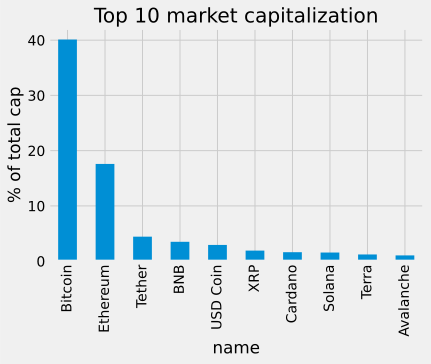

In [82]:
top10=cap10.assign(percent_of_market = lambda x:x.market_cap/cap.market_cap.sum()*100)
ax=top10.percent_of_market.plot.bar()
ax.set_ylabel(TOP_CAP_YLABEL)
ax.set_title(TOP_CAP_TITLE)
plt.show()


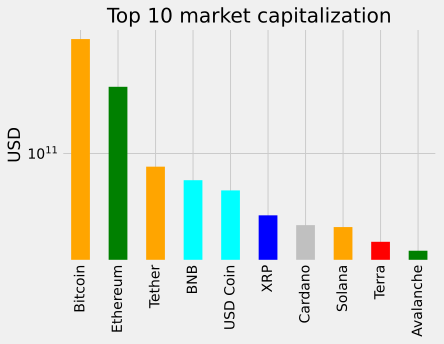

In [83]:
colors = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
ax=cap10.market_cap.plot.bar(color=colors,logy=True)
ax.set_ylabel('USD')
ax.set_xlabel('')
ax.set_title('Top 10 market capitalization')
plt.show()


Bitcoin and Ethereum make up over 50 percent of the entire Cryptocurrency market!

### What is going on? Volatility in cryptocurrencies

In [84]:
volatility=coins[['name','price_change_percentage_24h_in_currency']].set_index('name')
volatility =  volatility.sort_values('price_change_percentage_24h_in_currency',ascending=True)
volatility.head()

,price_change_percentage_24h_in_currency
name,
Ekta,-15.841907156640952
Hector Finance,-15.351891616543572
DeFi Land,-15.091495750872244
LooksRare,-14.258991195011722
Infinity Pad,-11.437499448701342


Top 5 losers in the last 24 hours

In [85]:
volatility24=coins[['name','price_change_percentage_24h_in_currency']].set_index('name')
volatility24 =  volatility.sort_values('price_change_percentage_24h_in_currency',ascending=False)
volatility24.head()

,price_change_percentage_24h_in_currency
name,
Phoenix Global [OLD],5311.082392669528
Bomber Coin,126.42362243271425
veDAO,50.371459952714446
API3,37.98867542545816
Pegaxy Stone,37.30796573821791


Top 5 winners in the last 24 hours.

(<Figure size 720x432 with 2 Axes>, <AxesSubplot:xlabel='name'>)

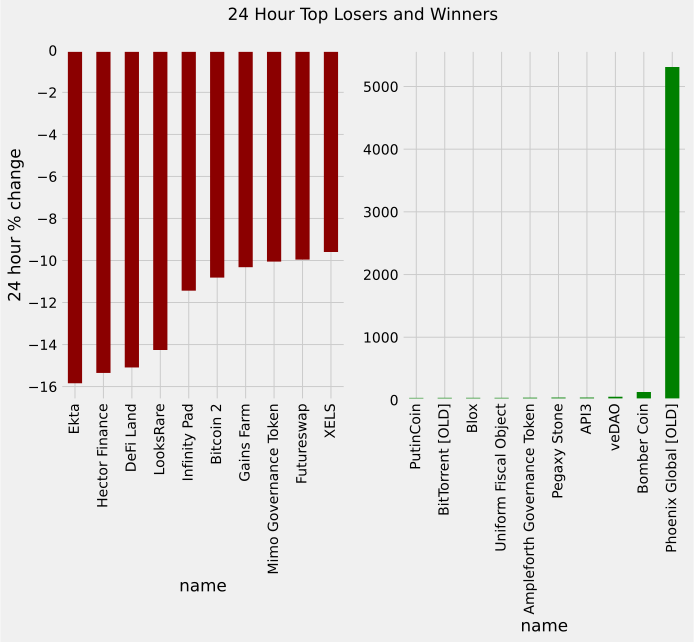

In [86]:
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('24 hour % change')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="green", ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 Hour Top Losers and Winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
top10_subplot(volatility.price_change_percentage_24h_in_currency, DTITLE)

(<Figure size 720x432 with 2 Axes>, <AxesSubplot:xlabel='name'>)

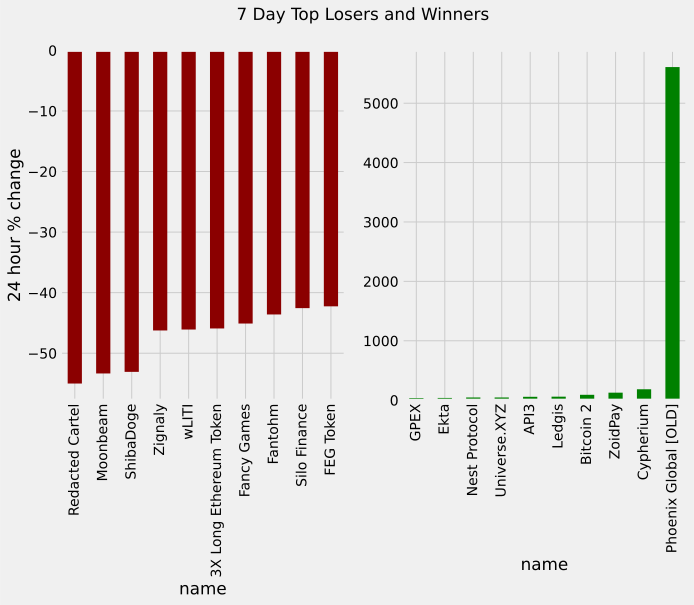

In [87]:
volatility2=coins[['name','price_change_percentage_7d_in_currency']].set_index('name')
volatility2 =  volatility2.sort_values('price_change_percentage_7d_in_currency',ascending=True)
volatility2.head()
def top10_subplot_7d(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility2_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('24 hour % change')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series2[-10:].plot.bar(color="green", ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "7 Day Top Losers and Winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
top10_subplot(volatility2.price_change_percentage_7d_in_currency, DTITLE)

In [88]:
weekly_loss_coins=volatility2
weekly_loss_coins.loc[weekly_loss_coins.price_change_percentage_7d_in_currency >0].count()
#coins with gains in the last 7 days

price_change_percentage_7d_in_currency    97
dtype: int64

In [89]:
weekly_loss_coins.loc[weekly_loss_coins.price_change_percentage_7d_in_currency <0].count()
#coins with losses in the last 7 days. 

price_change_percentage_7d_in_currency    895
dtype: int64

### Most coins are tiny

In [90]:
large_caps=coins.loc[coins.market_cap>10000000000]
large_caps

,symbol,name,market_cap,current_price,market_cap_rank,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,btc,Bitcoin,721134019784,38043.0,1,3.5484045955308283,-14.652639420612193
1,eth,Ethereum,316274066805,2643.16,2,4.59085805935834,-16.863318003268656
2,usdt,Tether,79609833194,1.003,3,0.171535995004725,0.36262407271708846
3,bnb,BNB,63048336666,375.05,4,5.693475268234085,-13.477412960328191
4,usdc,USD Coin,52863942571,1.001,5,0.09045092737229936,0.12951025042985528
5,xrp,XRP,34351288127,0.716194,6,5.0021061414985475,-15.98689868921966
6,ada,Cardano,29021316480,0.905455,7,8.834455605642482,-18.30447228361991
7,sol,Solana,28047083358,87.73,8,6.585917986076405,-16.32937587519903
8,luna,Terra,21741029925,56.16,9,14.406881438835098,-1.157312294632315
9,avax,Avalanche,18650700430,76.04,10,12.041236822628097,-18.060349884458148


**Coin Cap Breakdown**:
* Large cap: +10 billion
* Mid cap: 2 billion - 10 billion
* Small cap: 300 million - 2 billion
* Micro cap: 50 million - 300 million
* Nano cap: Below 50 million

In [91]:
cap_type=coins[['name','market_cap']]
cap_type

,name,market_cap
0,Bitcoin,721134019784
1,Ethereum,316274066805
2,Tether,79609833194
3,BNB,63048336666
4,USD Coin,52863942571
...,...,...
995,Infinity Pad,13434941
996,Media Licensing Token,13429996
997,Populous,13402927
998,Polychain Monsters,13393713


In [92]:
cap_type['Market_Cap_Type']=np.where(
     cap_type['market_cap'].between(0, 50000000, inclusive=False), 
    'Nano', 
     np.where(
        cap_type['market_cap'].between(50000000, 300000000, inclusive=False), 'Micro',
    np.where(
        cap_type['market_cap'].between(300000000, 2000000000, inclusive=False), 'Small',
    np.where(
        cap_type['market_cap'].between(2000000000, 10000000000, inclusive=False), 'Mid','Large'
     
         
     )))
)

<ipython-input-92-4e0b44d90da4>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(0, 50000000, inclusive=False),
<ipython-input-92-4e0b44d90da4>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(50000000, 300000000, inclusive=False), 'Micro',
<ipython-input-92-4e0b44d90da4>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(300000000, 2000000000, inclusive=False), 'Small',
<ipython-input-92-4e0b44d90da4>:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(2000000000, 10000000000, inclusive=False), 'Mid','Large'
<ipython-input-92-4e0b44d90da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Text(0.5, 1.0, 'Coin Market Cap Share')

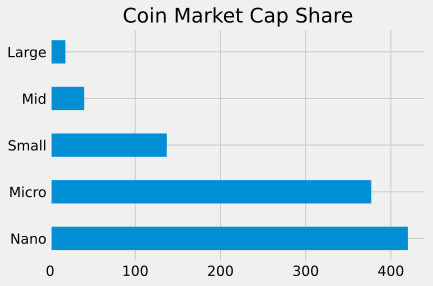

In [93]:
cap_type.Market_Cap_Type.value_counts().plot(kind='barh')
plt.title('Coin Market Cap Share')

([<matplotlib.patches.Wedge at 0x7fe78e41d9d0>,
 [Text(0.28604337205391894, 1.1654094513534818, ''),
  Text(-0.9080298580668582, -0.7845264666402795, ''),
  Text(0.765403866912362, -0.7900360248214023, ''),
  Text(1.0682919541123206, -0.2622065994190076, ''),
  Text(1.0982132250534675, -0.06267146334387166, '')],
 [Text(0.16685863369811937, 0.6798221799561978, '42%'),
  Text(-0.5296840838723338, -0.45764043887349637, '38%'),
  Text(0.4174930183158338, -0.4309287408116739, '14%'),
  Text(0.5827047022430839, -0.14302178150127687, '4%'),
  Text(0.5990253954837095, -0.03418443455120272, '2%')])

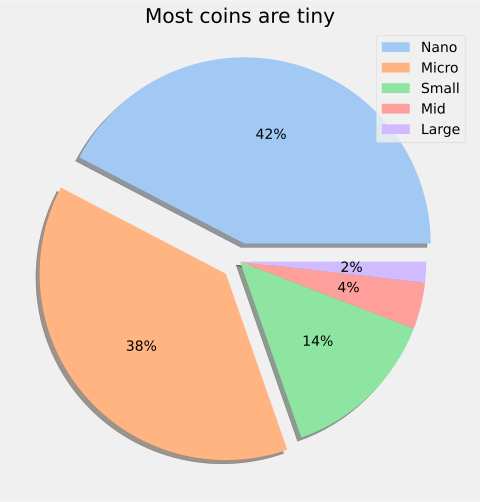

In [94]:
def perc(x):
    percent=x/984*100
    return percent
def market_pie_chart():
    percent_of_market = cap_type.Market_Cap_Type.value_counts().rename_axis('market_cap_type').reset_index(name='counts')
    percent_of_market['share_percentage']=percent_of_market.counts.apply(perc)
    plt.figure(figsize=(10,8))
    colors = sns.color_palette('pastel')[0:5]
    a=plt.pie(data=percent_of_market,x='share_percentage',colors=colors,autopct='%.0f%%',explode=(.1, .1, 0, 0,0),shadow=True )  
    plt.title('Most coins are tiny')
    plt.legend(percent_of_market['market_cap_type'])
    return a
market_pie_chart()

### **Key Findings**

* **Bitcoin and Ethereum make up a major share of the market**. Bitcoin alone makes up around 48% of the entire Cryptocurrency Market.





* **Crypto Currency is a very volatile asset**. Since I had live data through the use of the API, as I was working through some of the volatility charts I was seeing massive changes in percent change in just hours. At the time of writing this Phoenix Global OLD was up over 5000% in the last 24 hours followed by Mobius which is up over 300 % in 24 hours. Both Pheonix old and Mobis have market caps around 25 Million which makes them very volatile to any price movement in both directions which makes them very risky. These types of coins are also not seen on normal crypto exchanges like CoinBase due to their risk which makes them harder to buy as well. During my analysis the entire market took a crash so I was able to see some big losses in price as well. Stronghold token alone was down 33% in 24 hours as well as many others down 25% from the day before. Looking at the 7 Day chart, Starship and Euphoria were down over 60% in the last 7 days! Looking at all coins in the last 7 days, only 112 of the 1000 coins had posted gains in the last 7 days. As with any investing, there’s a big risk and reward situation there for people willing to take it. Look at this data a few weeks ago during a heavy bull ruin, the gains would have far out weight the losses!





* **Most coins in the market are tiny regarding their market cap**. 76% of coins were considered Nano or Micro meaning their market cap was less than 300 Million. A few years ago that might have been a big market cap, but now with bitcoin hovering around 1 trillion dollars, the field has really widened. 


### Short Comings in Analysis


I would have liked to focus on a select group of the top coins on the market right now and build a price prediction model based on the Coin Gecko api data. I will be visiting this project in a few months to start working on building out these models after studying some more on what models for this would be best!
